# <center> DOMACI ZADATAK 5 <center/>

### Pokretanjem svake od ćelija prikazivaće se promena vrednosti stanja, Q-tabele i politika. Ćelije je najbolje pokretati redom, da ne bi došlo do nekih greški.

In [1]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns


from Domaci_5 import Environment, Agent

In [2]:
%matplotlib inline
from IPython.display import clear_output
import pandas as pd

def show_results(env):
    
    global agent_1

    columns = ['0', '1', '2', '3']
    rows = ['0', '1', '2']

    pi = env.all_pi
    DF = []
    V_opt = agent_1.V_opt

    data = {}
    for q in env.Q_frames:
        for s in env.states:
            for i, a in enumerate(env.all_actions):
                data[s] = q[s[0], s[1], :] 
        df = round(pd.DataFrame.from_dict(data, orient='index', columns = env.all_actions),2)
        DF.append(df)

    for i, frame in enumerate(env.frames):
        
        sns.set(font_scale=1.3)

        fig, ax = plt.subplots(1,2, figsize=(15,5))
        fig.tight_layout()
        fig.subplots_adjust(top=0.83)
        if env.alpha==None and env.adapt==False:
            fig.suptitle('Rezultati za gamma = ' + str(env.gamma) + ' i verovatnocu kretanja ' + str(env.prob))
        elif env.alpha!=None and env.adapt==True:
            fig.suptitle('Rezultati za gamma = ' + str(env.gamma) + ', verovatnocu kretanja ' + str(env.prob) + ', eps = ' + str(env.epsilon) + ' i alpha = ' + str(round(env.alpha[i],2)))

        if env.alpha==None:
            labels = (np.asarray(["{0}\n{1:.2f}".format(pi[i],frame) for pi[i], frame in zip(pi[i].flatten(), frame.flatten())])).reshape(3,4)
        else:
            labels = (np.asarray(["{0}\n{1:.2f}\n\n{2:.2f}".format(pi[i],frame,V_opt) for pi[i], frame, V_opt in zip(pi[i].flatten(), frame.flatten(), V_opt.flatten())])).reshape(3,4)
        
        sns.heatmap(frame, mask=frame > 1, annot=labels, fmt='', linewidths=.5, cmap="RdYlGn", vmin=-1, vmax=1,cbar = False, robust=True, ax=ax[0])  
        
        ax[0].set_title('Stanja i politika u ' + str(i) + '. iteraciji | epizodi')
        ax[0].set_xticks(np.array([0,1,2,3]), columns)
        ax[0].set_yticks(np.array([0,1,2]), rows)

        sns.heatmap(DF[i], annot=True, cmap='RdYlGn', linewidths=0.5, ax = ax[1], cbar = False, vmin=-1, vmax=1)
        ax[1].set_title('Vrednosti Q u ' + str(i) + '. iteraciji | epizodi')
        ax[1].set_yticks(np.array(range(len(env.states))), env.states)
        ax[1].set_xticks(np.array([0,1,2,3]), env.all_actions)
        
        plt.show()
        clear_output(wait=True)
        sleep(0.2)
    

## 1. Resavanje poznatog MPO

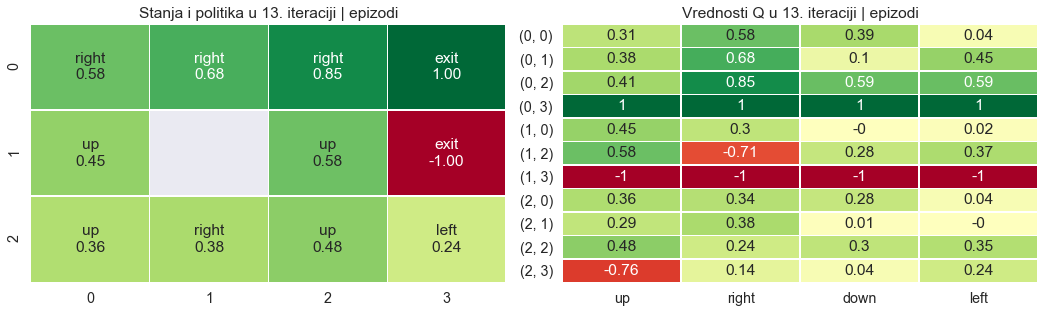

In [3]:
env_1 = Environment([0.8, 0.1, 0.1])    
start = (2, 0)

agent_1 = Agent(env_1, start)        
agent_1.Q_iteration(gamma=1, tol=0.01)
show_results(env_1)

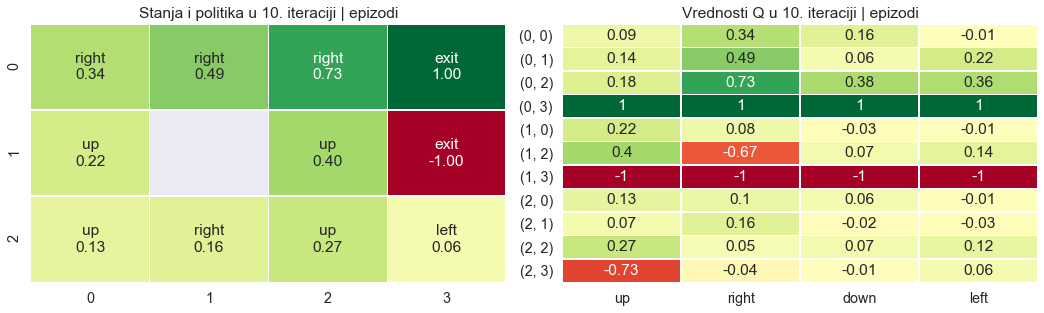

In [4]:
agent_2 = Agent(env_1, start)
agent_2.Q_iteration(gamma=0.9, tol=0.01)

show_results(env_1)

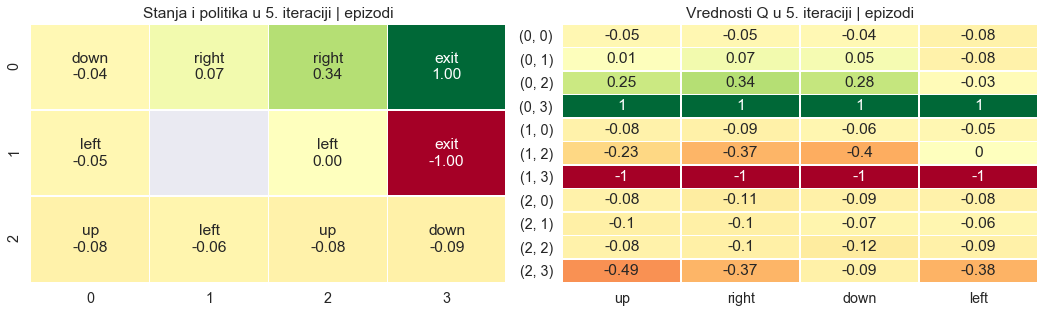

In [55]:
env_2 = Environment([0.4, 0.3, 0.3])  

agent = Agent(env_2, start)        
agent.Q_iteration(gamma=1, tol=0.01)

show_results(env_2)

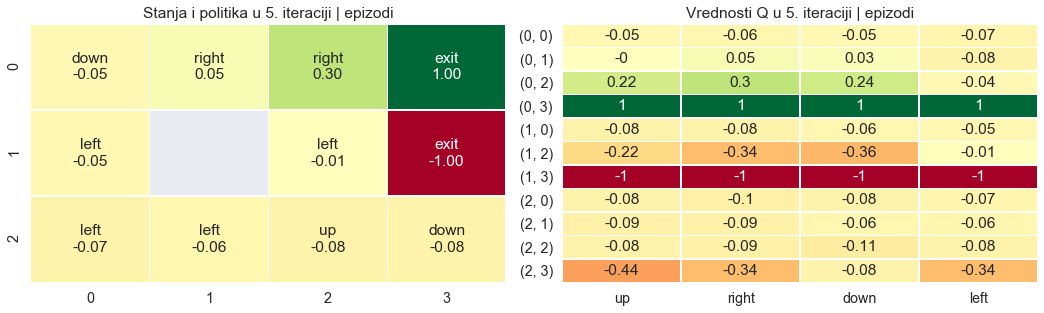

In [56]:
agent.Q_iteration(gamma=0.9, tol=0.01)

show_results(env_2)

## 2. Resavanje nepoznatog MPO

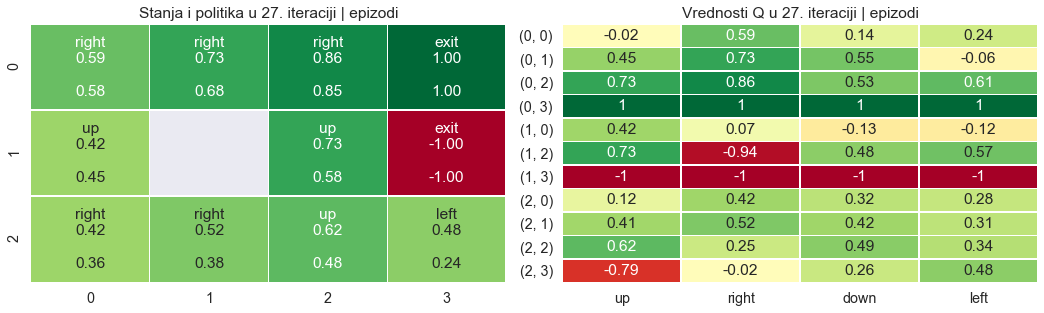

In [9]:
env_3 = Environment([0.8, 0.1, 0.1]) 

agent = Agent(env_3, start)        
agent.Q_learning(eps = 0.5, alpha = .6, gamma = 0.9, tol = 0.01, adapt = False)

show_results(env_3)

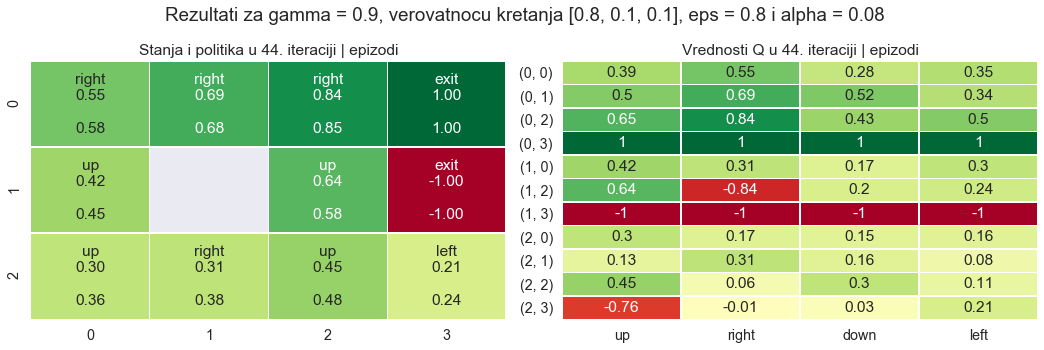

In [58]:
env_4 = Environment([0.8, 0.1, 0.1]) 

agent = Agent(env_4, start)        
agent.Q_learning(eps = 0.8, alpha = 0.6, gamma = 0.9, tol = 0.01, adapt = True)

show_results(env_4)